## Binary image classification using Convolutional Neural Network

**Dataset : https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification**

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification")


In [3]:
import tensorflow as tf

In [4]:
train_path = r'C:\Users\Siva Reddy\Desktop\DeepLearning\Tensorflow\classification\cats-and-dogs-image-classification\train'
image_width = 256
image_height = 256
batch_size = 32
train_set, validation_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='binary',
    
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_width, image_height),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='both',
)

Found 557 files belonging to 2 classes.
Using 446 files for training.
Using 111 files for validation.


In [5]:
class_names = train_set.class_names
class_names

['cats', 'dogs']

In [6]:
#class_names = {'cats' : 0, 'dogs' : 1}

In [7]:
print(len(train_set))  #446/32
print(len(validation_set)) #111/32

14
4


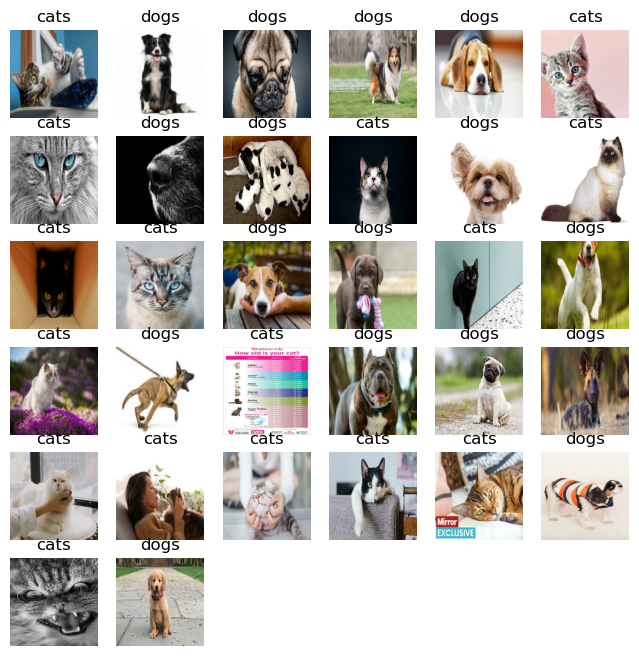

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for img, label in train_set.take(1):
     
    for i in range(32):
        plt.subplot(6,6,i+1)
        
#         print('before:',(np.min(img[i]),np.max(img[i]))) 
#         print('After:',(np.min(img[i].numpy().astype('uint8')),np.max(img[i].numpy().astype('uint8'))))
        
        plt.imshow(img[i].numpy().astype('uint8'))
        l = label[i].numpy().astype('uint8')[0]
        plt.title(class_names[l])
        plt.axis('off')
    

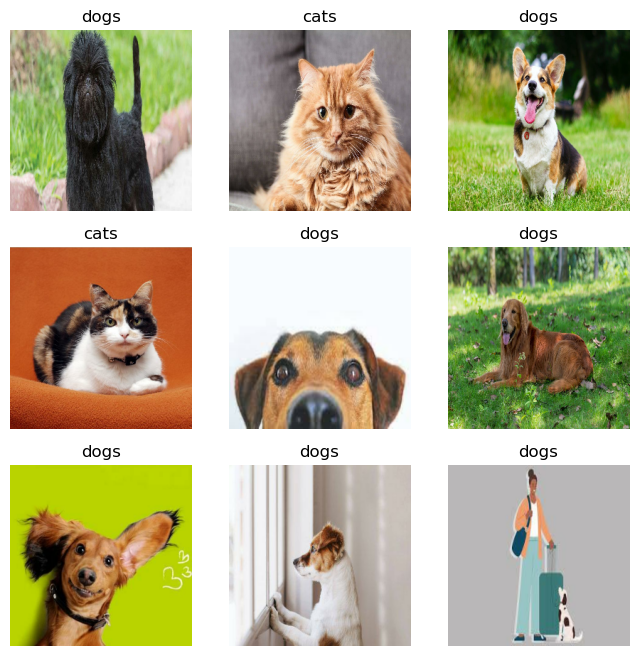

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for img, label in validation_set.take(1):
     
    for i in range(9):
        plt.subplot(3,3,i+1)
        
#         print('before:',(np.min(img[i]),np.max(img[i]))) 
#         print('After:',(np.min(img[i].numpy().astype('uint8')),np.max(img[i].numpy().astype('uint8'))))
        
        plt.imshow(img[i].numpy().astype('uint8'))
        l = label[i].numpy().astype('uint8')[0]
        plt.title(class_names[l])
        plt.axis('off')
    

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [11]:
CNN_model = Sequential()

CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Flatten())

CNN_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.5))

CNN_model.add(Dense(1, activation='sigmoid'))


In [12]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     2

In [13]:
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = r'C:\Users\Siva Reddy\Desktop\DeepLearning\Tensorflow\classification\best_model.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_loss',  # You can also use 'val_accuracy' or other metrics
    verbose=1,
    save_best_only=True,
    mode='min'  # Set to 'max' if using metrics like accuracy
)

#fit the model
history = CNN_model.fit(train_set,
                  batch_size = batch_size,
                  epochs=25,
                  validation_data = validation_set,callbacks=[checkpoint])

Epoch 1/25
14/14 [==============================] - ETA: 0s - loss: 1.4532 - accuracy: 0.5605
Epoch 1: val_loss improved from inf to 4.45464, saving model to C:\Users\Siva Reddy\Desktop\DeepLearning\Tensorflow\classification\best_model.h5
14/14 [==============================] - 57s 4s/step - loss: 1.4532 - accuracy: 0.5605 - val_loss: 4.4546 - val_accuracy: 0.4955
Epoch 2/25
14/14 [==============================] - ETA: 0s - loss: 1.3113 - accuracy: 0.6816
Epoch 2: val_loss improved from 4.45464 to 3.01490, saving model to C:\Users\Siva Reddy\Desktop\DeepLearning\Tensorflow\classification\best_model.h5
14/14 [==============================] - 46s 3s/step - loss: 1.3113 - accuracy: 0.6816 - val_loss: 3.0149 - val_accuracy: 0.5045
Epoch 3/25
14/14 [==============================] - ETA: 0s - loss: 1.3172 - accuracy: 0.7085
Epoch 3: val_loss improved from 3.01490 to 1.84402, saving model to C:\Users\Siva Reddy\Desktop\DeepLearning\Tensorflow\classification\best_model.h5
14/14 [==========

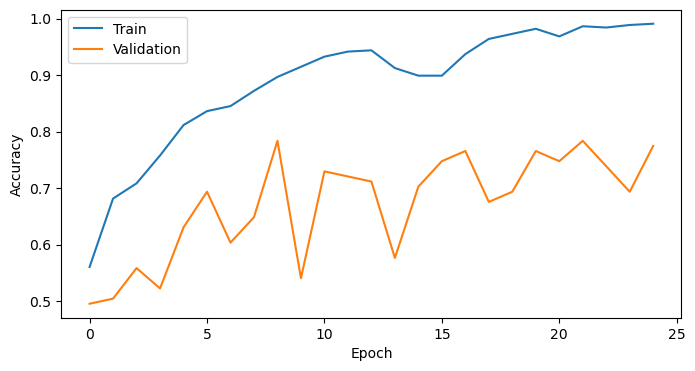

In [15]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

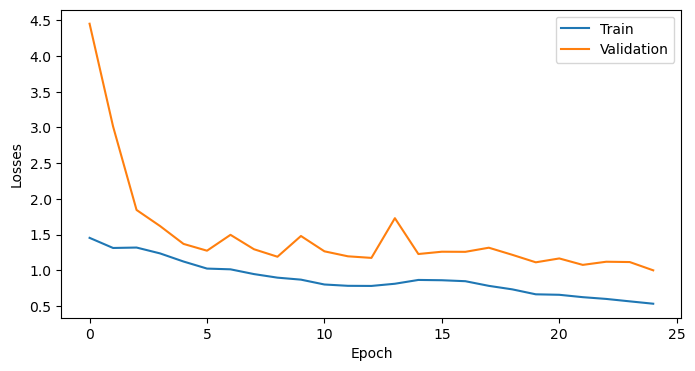

In [16]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Inference**

In [17]:
import glob as glob

img_path = r'C:\Users\Siva Reddy\Desktop\DeepLearning\Tensorflow\classification\cats-and-dogs-image-classification\pred'
image = glob.glob(img_path+'/*')
image[1:3]

['C:\\Users\\Siva Reddy\\Desktop\\DeepLearning\\Tensorflow\\classification\\cats-and-dogs-image-classification\\pred\\cat_162.jpg',
 'C:\\Users\\Siva Reddy\\Desktop\\DeepLearning\\Tensorflow\\classification\\cats-and-dogs-image-classification\\pred\\cat_464.jpg']

**Prediction on single image**

In [18]:
def pred_type(output):
    if output > 0.5:
        return 1
    else:
        return 0

In [19]:
import cv2
im = cv2.imread(image[2])
print(im.shape)
image_resized = cv2.resize(im, (256, 256))
print(image_resized.shape)
im = np.expand_dims(image_resized, axis=0)
pred = CNN_model.predict(im)
print(pred)
class_names[pred_type(pred[0][0])]

(413, 620, 3)
(256, 256, 3)
1/1 [==============================] - 0s 231ms/step
[[0.07052427]]


'cats'

**predictions on multiple images**

(256, 256, 3)
1/1 [==============================] - 0s 64ms/step
[[0.31142923]]
cats
(256, 256, 3)
1/1 [==============================] - 0s 68ms/step
[[0.01114617]]
cats
(256, 256, 3)
1/1 [==============================] - 0s 69ms/step
[[0.07052427]]
cats
(256, 256, 3)
1/1 [==============================] - 0s 83ms/step
[[0.4458803]]
cats
(256, 256, 3)
1/1 [==============================] - 0s 59ms/step
[[0.29863262]]
cats
(256, 256, 3)
1/1 [==============================] - 0s 65ms/step
[[0.9537584]]
dogs
(256, 256, 3)
1/1 [==============================] - 0s 53ms/step
[[0.22842006]]
cats
(256, 256, 3)
1/1 [==============================] - 0s 66ms/step
[[0.64550984]]
dogs
(256, 256, 3)
1/1 [==============================] - 0s 66ms/step
[[0.957297]]
dogs


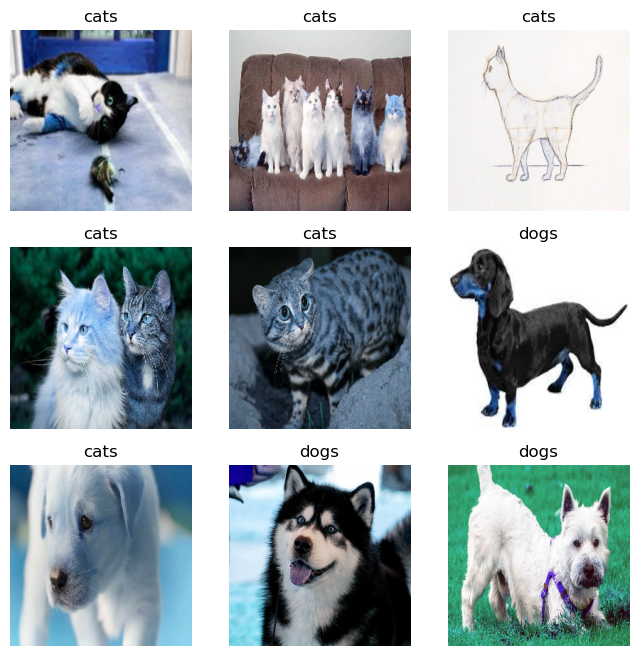

In [20]:
import cv2

plt.figure(figsize=(8,8))
for i in range(9):
    #print(i)
    plt.subplot(3,3,i+1)
    
    im = cv2.imread((image[i]))
    #print(im.shape)
    image_resized = cv2.resize(im, (256, 256))
    plt.axis('off')
    print(image_resized.shape)
    image_ = np.expand_dims(image_resized, axis=0)
    
    pred = CNN_model.predict(image_)
    print(pred)
    
    res = class_names[pred_type(pred[0][0])]
    print(res)
    plt.imshow(image_resized)
    plt.title(res)
    plt.axis('off')

**Evaluation**

In [21]:
test_path = r'C:\Users\Siva Reddy\Desktop\DeepLearning\Tensorflow\classification\cats-and-dogs-image-classification\test'
image_width = 256
image_height = 256
batch_size = 32
test_set= tf.keras.utils.image_dataset_from_directory(
    test_path,
    label_mode='binary',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_width, image_height),
    shuffle=True,
    seed=123,
)

Found 130 files belonging to 2 classes.


In [22]:
class_names = test_set.class_names
class_names

['cats', 'dogs']

In [23]:
Train_score= CNN_model.evaluate(train_set)
print(f'Train loss : {Train_score[0]}, Train accuracy : {Train_score[1]}')

14/14 [==============================] - 11s 726ms/step - loss: 0.5293 - accuracy: 0.9933
Train loss : 0.5292704701423645, Train accuracy : 0.9932735562324524


In [24]:
Test_score= CNN_model.evaluate(test_set)
print(f'Test loss : {Test_score[0]}, Test accuracy : {Test_score[1]}')

5/5 [==============================] - 3s 559ms/step - loss: 1.1481 - accuracy: 0.6615
Test loss : 1.1480742692947388, Test accuracy : 0.6615384817123413


In [25]:
test_pred = CNN_model.predict(test_set)
test_pred

5/5 [==============================] - 3s 552ms/step


array([[1.79967023e-02],
       [8.59481514e-01],
       [4.20061737e-01],
       [6.77933812e-01],
       [2.10718200e-01],
       [5.41293323e-01],
       [1.93892837e-01],
       [1.18333325e-01],
       [2.39245459e-01],
       [3.68518263e-01],
       [8.90000761e-01],
       [1.87373489e-01],
       [5.69057822e-01],
       [1.17502749e-01],
       [2.26671714e-02],
       [5.34849465e-01],
       [2.01389894e-01],
       [2.09540859e-01],
       [7.70843029e-01],
       [4.02407371e-04],
       [9.09593642e-01],
       [1.86215539e-03],
       [5.38656175e-01],
       [8.19565296e-01],
       [9.52215850e-01],
       [3.13539058e-01],
       [1.25716832e-02],
       [6.70417771e-02],
       [2.72099557e-03],
       [3.77949655e-01],
       [6.15350269e-02],
       [1.99597418e-01],
       [1.19279034e-01],
       [9.17391002e-01],
       [1.40916139e-01],
       [2.61143535e-01],
       [9.40236211e-01],
       [8.38006020e-01],
       [9.58874404e-01],
       [6.38025939e-01],


In [26]:
pred_labels = []
for i in test_pred:
    #print(i[0])
    res = pred_type(i[0])
    pred_labels.append(res)
    

In [27]:
pred_labels

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0]

In [28]:
actual_labels = []
for i, l in test_set.take(5):
    for j in l:
        actual_labels.append(j.numpy().astype('uint8')[0])
        

In [29]:
actual_labels

[0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0]

In [30]:

# actual_labels = ["dogs" if i==1 else "cats" for i in actual_labels]
# print(actual_labels)


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
cm  =  confusion_matrix(actual_labels, pred_labels)
cm

array([[38, 27],
       [31, 34]], dtype=int64)

In [32]:
print(classification_report(actual_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.55      0.58      0.57        65
           1       0.56      0.52      0.54        65

    accuracy                           0.55       130
   macro avg       0.55      0.55      0.55       130
weighted avg       0.55      0.55      0.55       130



In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             brightness_range=(0.1,0.3),
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)


validation_datagen = ImageDataGenerator(rescale=1./255)